In [16]:
#Normal Random Walk

import PIL.Image
from PIL.Image import Image
import random
import IPython.display
from typing import Callable

class Pair:
    def __init__(self, x, y):
        self.x = x
        self.y = y

#Settings
width = height = 200
x = int(width / 2)
y = int(height / 2)
red = (255, 0, 0)
scale = 2
iterations = 1000

def run(walk : Callable[[Pair, list[list[bool]]], None]) -> IPython.display.Image:
    p : Pair = Pair(x, y)
    filledMap = [[False] * width for _ in range(height)]
    image : Image = PIL.Image.new('RGB', (width, height), "white")
    imageSeq : list[Image] = [image.copy().resize((scale*width, scale*height))]
    for i in range(iterations):
        walk(p, filledMap)
        if p.x >= width - 2: p.x = width - 2
        if p.x < 1: p.x = 1
        if p.y >= height - 2: p.y = height - 2
        if p.y < 1: p.y = 1
        if 0 < p.x < width and 0 < p.y < height: 
            image.putpixel((p.x, p.y), red)
            filledMap[p.x][p.y] = True
        if i % 3: #Only draw an image every 3 frames
            imageSeq.append(image.copy().resize((scale*width, scale*height)))
    name = walk.__name__ + '.gif'
    imageSeq[0].save(name,save_all=True,append_images=imageSeq,duration=1,loop=1)
    return IPython.display.Image(open(name,'rb').read())

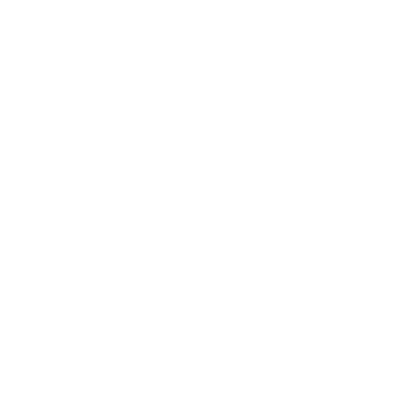

In [18]:
def randomWalk(p : Pair, _) -> None:
    rand : int = random.randint(1,4)
    if rand == 1:
        p.x += 1
    if rand == 2:
        p.y += 1
    if rand == 3:
        p.x -= 1
    if rand == 4:
        p.y -= 1

run(randomWalk)

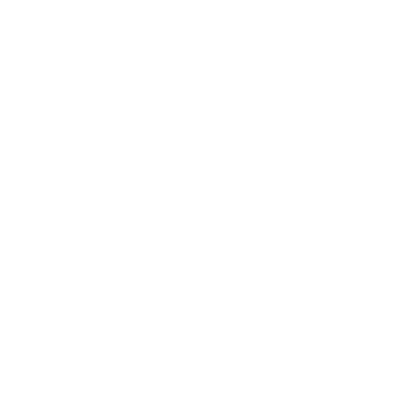

: 

In [18]:
def randomWalkLeftBias(p : Pair, _) -> None:
    rand : int = random.randint(1,5)
    if rand == 1:
        p.x += 1
    if rand == 2 or rand == 3:
        p.y += 1
    if rand == 4:
        p.x -= 1
    if rand == 5:
        p.y -= 1

run(randomWalkLeftBias)

In [20]:
def randomWalkNoBackwards(p : Pair, filledMap) -> None:
    rand : int = random.randint(1,3)
    if filledMap[p.x + 1][p.y] == True:
        if rand == 1: p.x -= 1
        if rand == 2: p.y -= 1
        if rand == 3: p.y += 1
    elif filledMap[p.x - 1][p.y] == True:
        if rand == 1: p.x += 1
        if rand == 2: p.y -= 1
        if rand == 3: p.y += 1
    elif filledMap[p.x][p.y + 1] == True:
        if rand == 1: p.x -= 1
        if rand == 2: p.y -= 1
        if rand == 3: p.x += 1
    elif filledMap[p.x + 1][p.y - 1] == True:
        if rand == 1: p.x -= 1
        if rand == 2: p.y += 1
        if rand == 3: p.x += 1
    else:
        p.x += 1
        p.y += 1

run(randomWalkNoBackwards)

: 

: 